# Figure S1: Coverage plots

February 8, 2019

This notebook contains code for producing coverage plots. I have plotted the mean and standard deviation coverage for each site in the genome when averaging across all 13 samples (human and duck). 

In [4]:
import sys, subprocess, glob, os, shutil, re, importlib
from subprocess import call
from Bio import SeqIO
from Bio.Seq import Seq
from Bio import AlignIO
import pandas as pd
import statistics
import rpy2
%load_ext rpy2.ipython 

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [5]:
directory = "/Volumes/LHM_postdoc-hard_backups/stored_files_too_big_for_laptop/H5N1_Cambodia_outbreak_study/Cambodia_H5_sequence_raw_data/combined_human_and_bird_usable_subset/"

In [6]:
# read in pileup files
pileups = []
for f in glob.glob(directory + "*/coverage_norm_and_duplicate_read_removal/*.nodups.sam.pileup"):
    pileups.append(f)
    
print(len(pileups))

13


In [7]:
coverages = {}
coverage_means = {}

for p in pileups: 
    with open(p, "r") as infile: 
        count = 0
        
        for line in infile: 
            count += 1
            header = line.split("\t")[0]
            sample = "/".join(header.split("_")[1:-1])
            gene = "".join(header.split("_")[-1:])
            site = line.split("\t")[1]
            coverage = int(line.split("\t")[3])
            
            if sample not in coverages: 
                coverages[sample] = {}
            if gene not in coverages[sample]:
                coverages[sample][gene] = []
            if gene in coverages[sample]: 
                coverages[sample][gene].append(coverage)
    
#print(coverages)   
    coverage_means[sample] = {}
    for gene in coverages[sample]:
        mean = float(sum(coverages[sample][gene]))/len(coverages[sample][gene])
        stdev = float(statistics.stdev(coverages[sample][gene]))
        
        coverage_means[sample][gene] = {}
        coverage_means[sample][gene]["mean"] = mean
        coverage_means[sample][gene]["stdev"] = stdev

In [8]:
df = pd.DataFrame.from_dict(coverage_means, orient="columns")
df.head()

,A/duck/Cambodia/381W11M4/2013,A/duck/Cambodia/PV027D1/2010,A/duck/Cambodia/083D1/2011,A/duck/Cambodia/Y0224301/2014,A/duck/Cambodia/Y0224304/2014,A/Cambodia/X0128304/2013,A/CAMBODIA/V0401301/2011,A/CAMBODIA/V0417301/2011,A/Cambodia/W0112303/2012,A/Cambodia/X0125302/2013,A/Cambodia/X0207301/2013,A/Cambodia/X0219301/2013,A/Cambodia/X1030304/2013
H5,"{'mean': 221.34212067955477, 'stdev': 55.99762...","{'mean': 215.46276293348492, 'stdev': 68.71853...","{'mean': 239.8465909090909, 'stdev': 76.957393...","{'mean': 203.88810779144697, 'stdev': 62.73540...","{'mean': 209.59122006841505, 'stdev': 75.35279...","{'mean': 228.97518330513253, 'stdev': 97.64235...","{'mean': 183.82122260668973, 'stdev': 134.9547...","{'mean': 214.59226713532513, 'stdev': 82.76427...","{'mean': 195.800799086758, 'stdev': 81.1066077...","{'mean': 109.44050343249428, 'stdev': 46.88024...","{'mean': 215.20386643233743, 'stdev': 80.20341...","{'mean': 111.77262180974478, 'stdev': 33.79392...","{'mean': 306.29759812536616, 'stdev': 129.8721..."
MP,"{'mean': 253.07722772277228, 'stdev': 81.51758...","{'mean': 258.6630963972736, 'stdev': 85.566267...","{'mean': 276.6756487025948, 'stdev': 89.439868...","{'mean': 270.1986234021632, 'stdev': 87.293095...","{'mean': 305.05226824457594, 'stdev': 97.01337...","{'mean': 282.0759493670886, 'stdev': 97.782808...","{'mean': 303.6952288218111, 'stdev': 116.55080...","{'mean': 337.47093596059113, 'stdev': 123.7110...","{'mean': 329.7624148003895, 'stdev': 122.45552...","{'mean': 362.92906403940884, 'stdev': 128.6259...","{'mean': 341.66503428011754, 'stdev': 125.5195...","{'mean': 331.84516765285997, 'stdev': 122.1372...","{'mean': 347.55165692007796, 'stdev': 126.4523..."
N1,"{'mean': 209.87028985507246, 'stdev': 48.75882...","{'mean': 217.60361010830326, 'stdev': 54.75955...","{'mean': 272.92554744525546, 'stdev': 60.55202...","{'mean': 267.42162554426704, 'stdev': 73.16024...","{'mean': 238.35264301230993, 'stdev': 76.08532...","{'mean': 296.6331403762663, 'stdev': 93.673694...","{'mean': 304.2348703170029, 'stdev': 101.22469...","{'mean': 333.76461988304095, 'stdev': 92.78037...","{'mean': 340.3462922966163, 'stdev': 105.58890...","{'mean': 347.0137481910275, 'stdev': 103.38523...","{'mean': 352.3092250922509, 'stdev': 93.885940...","{'mean': 346.4718614718615, 'stdev': 102.04930...","{'mean': 327.024926686217, 'stdev': 87.6585583..."
NP,"{'mean': 205.98704663212436, 'stdev': 56.00401...","{'mean': 243.12597402597402, 'stdev': 63.65726...","{'mean': 242.06878650227125, 'stdev': 60.65071...","{'mean': 249.77792207792209, 'stdev': 67.52731...","{'mean': 223.83387835186397, 'stdev': 56.01667...","{'mean': 263.43132220795894, 'stdev': 100.2919...","{'mean': 308.6030483764082, 'stdev': 95.701892...","{'mean': 348.16634178037685, 'stdev': 99.59557...","{'mean': 344.54174757281555, 'stdev': 101.1630...","{'mean': 335.9761444229529, 'stdev': 98.078211...","{'mean': 345.42590206185565, 'stdev': 97.13795...","{'mean': 336.09003215434086, 'stdev': 99.02450...","{'mean': 331.47467532467533, 'stdev': 99.34147..."
NS,"{'mean': 233.52927669345578, 'stdev': 83.41295...","{'mean': 232.1209677419355, 'stdev': 88.987695...","{'mean': 268.2782909930716, 'stdev': 97.787760...","{'mean': 263.0208333333333, 'stdev': 94.465659...","{'mean': 302.46514285714284, 'stdev': 110.4690...","{'mean': 286.9097142857143, 'stdev': 99.724861...","{'mean': 266.86285714285714, 'stdev': 119.6300...","{'mean': 300.01406799531065, 'stdev': 131.6918...","{'mean': 294.60326721120185, 'stdev': 128.4372...","{'mean': 332.85498839907194, 'stdev': 132.2847...","{'mean': 284.22458628841605, 'stdev': 117.9248...","{'mean': 291.8484848484849, 'stdev': 116.49567...","{'mean': 340.39176470588234, 'stdev': 134.3942..."


In [9]:
# do it instead by site now

coverages = {}
coverage_means = {}

for p in pileups: 
    with open(p, "r") as infile: 
        count = 0
        
        for line in infile: 
            count += 1
            header = line.split("\t")[0]
            sample = "/".join(header.split("_")[1:-1])
            gene = "".join(header.split("_")[-1:])
            site = line.split("\t")[1]
            coverage = int(line.split("\t")[3])
            
            if gene not in coverages: 
                coverages[gene] = {}
            if site not in coverages[gene]:
                coverages[gene][site] = []
            if site in coverages[gene]:
                coverages[gene][site].append(coverage)

In [10]:
# print out the maximum site in each gene for this dataset
for gene in coverages:
    sites = []
    for site in coverages[gene]:
        sites.append(int(site))
    print(gene, max(sites))
#     for site in coverages[gene]:
#         if len(coverages[gene][site]) != 13:
#             print(gene, site,coverages[gene][site])

H5 1773
MP 1027
N1 1389
NP 1558
NS 875
PA 2233
PB1 2341
PB2 2341


In [11]:
coverage_means = {}
coverage_stdevs = {}

for gene in coverages: 
    coverage_means[gene] = {}
    coverage_stdevs[gene] = {}
    
    for site in coverages[gene]:
        if len(coverages[gene][site])  < 13:
            extras = 11 - len(coverages[gene][site])
            for i in range(extras):
                coverages[gene][site].append(0)
            
        mean = float(sum(coverages[gene][site]))/len(coverages[gene][site])
        stdev = float(statistics.stdev(coverages[gene][site]))
        
        coverage_means[gene][site] = mean
        coverage_stdevs[gene][site] = stdev

In [12]:
print(len(coverage_means), len(coverage_stdevs))

8 8


In [13]:
meansdf = pd.DataFrame.from_dict(coverage_means, orient="columns")
stdevsdf = pd.DataFrame.from_dict(coverage_stdevs, orient="columns")
meansdf.reset_index(inplace=True)
stdevsdf.reset_index(inplace=True)
meansdf.head()

,index,H5,MP,N1,NP,NS,PA,PB1,PB2
0,1,0.384615,0.615385,0.769231,3.461538,1.230769,1.000000,0.727273,0.615385
1,10,12.692308,18.384615,16.307692,19.000000,17.538462,17.923077,13.916667,13.384615
2,100,103.076923,163.230769,164.153846,146.076923,160.307692,144.076923,146.166667,127.538462
3,1000,219.153846,105.923077,326.692308,337.000000,NaN,295.692308,313.000000,240.384615
4,1001,219.538462,100.307692,327.692308,337.230769,NaN,295.538462,312.166667,240.307692


In [14]:
meansdf = meansdf.melt(id_vars="index")
stdevsdf = stdevsdf.melt(id_vars="index")
meansdf = meansdf.rename(columns={'value':'mean', 'variable':'gene', 'index':'site'})
stdevsdf = stdevsdf.rename(columns={'value':'stdev', 'variable':'gene', 'index':'site'})
meansdf.head()

,site,gene,mean
0,1,H5,0.384615
1,10,H5,12.692308
2,100,H5,103.076923
3,1000,H5,219.153846
4,1001,H5,219.538462


In [15]:
# merge together
df = pd.merge(meansdf,stdevsdf, on=['site','gene'])
df['site'] = pd.to_numeric(df['site'])
df['upper'] = df['mean'] + df['stdev']
df['lower'] = df['mean'] - df['stdev']
df.head()

,site,gene,mean,stdev,upper,lower
0,1,H5,0.384615,0.506370,0.890985,-0.121754
1,10,H5,12.692308,4.732593,17.424901,7.959715
2,100,H5,103.076923,31.823633,134.900556,71.253291
3,1000,H5,219.153846,77.026885,296.180731,142.126961
4,1001,H5,219.538462,77.293397,296.831859,142.245064


In [16]:
# get rid of NaN rows
df = df.dropna()

In [17]:
%%R -w 800 -h 600 -u px -i df  # this sets the size of the plot...otherwise, it will go off the page
require(ggplot2)
library(ggplot2)

df$gene = gsub("H5","HA",df$gene)
df$gene = gsub("N1","NA",df$gene)
df$genef = factor(df$gene, levels=c("PB2","PB1","PA","HA","NP","NA","MP","NS"))

blank_data <- data.frame(genef = c("PB2","PB2","PB1","PB1","PA","PA","HA","HA","NP","NP","NA","NA","MP","MP","NS","NS"), x = c(0,2500,0,2500,0,2500,0,2000,0,2000,0,1500,0,1200,0,1000), y = 0)

p <- ggplot(data=df, aes(x=site, y=mean, group=genef)) + 
    geom_ribbon(aes(x=site, ymin=lower, ymax=upper), fill="grey80", linetype=0, alpha=0.6)+
    geom_line(size=1)+    
    geom_blank(data = blank_data, aes(x = x, y = y))+
    labs(x="nucleotide site",y="mean frequency")+
    theme(plot.title = element_text(size=20, hjust=0.5))+
    theme(panel.grid.major.y=element_line(colour=NA))+
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(strip.text=element_text(size=16))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title.y=element_text(size=16, vjust=8))+
    theme(axis.title.x=element_text(size=16, vjust=-10))+
    theme(axis.text=element_text(size=14, colour="black"))+
    theme(axis.text.x=element_text(size=14))+
    theme(legend.text=element_text(size=16))+
    theme(legend.title=element_text(size=16, face="plain"))+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,1,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))+
    facet_wrap(~genef, scales="free")+
    scale_y_continuous(breaks=seq(0,500,100), limits=c(0,500))+
    scale_x_continuous(expand = c(0, 0))+
    expand_limits(x = 0)

p
ggsave("Fig-S1-coverage-plots-v1.pdf", p, width = 12, height = 8, device=pdf, path="/Users/lmoncla/Documents/H5N1_Cambodian_outbreak_study/paper-and-figure-drafts/figures-2019-02-20")

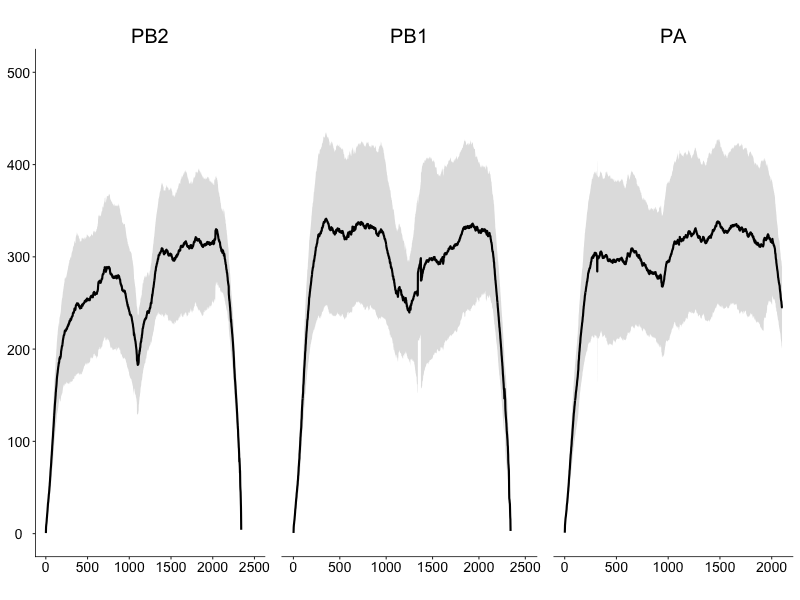

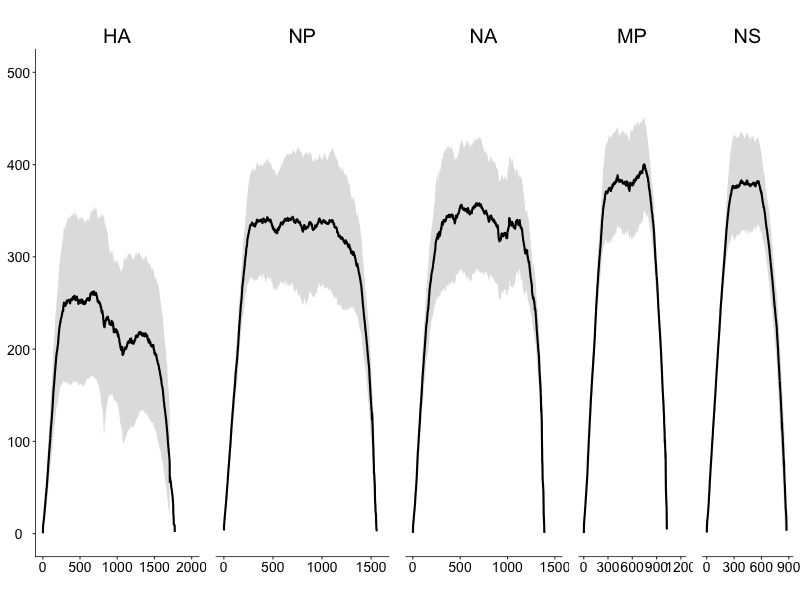

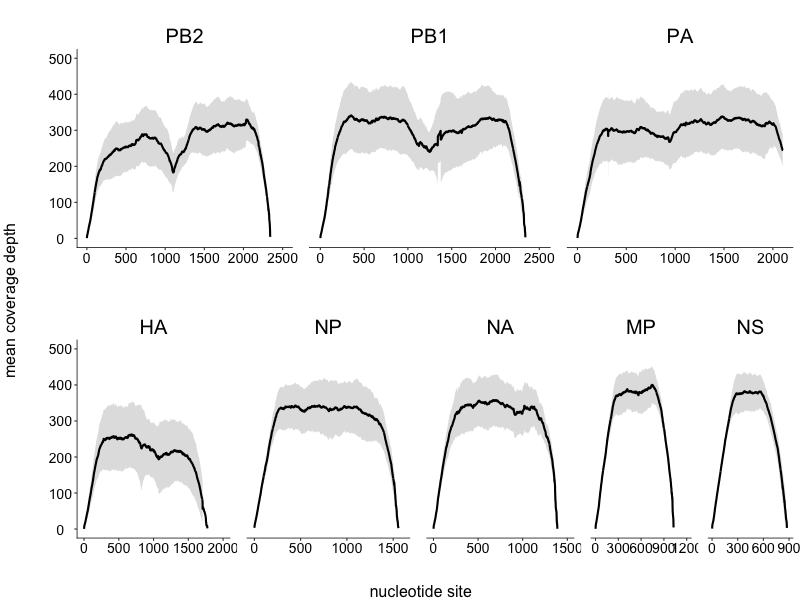

In [31]:
%%R -w 800 -h 600 -u px -i df  # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
require(grid)
library(grid)
require(gridExtra)
library(gridExtra)

df$gene = gsub("H5","HA",df$gene)
df$gene = gsub("N1","NA",df$gene)
df$genef = factor(df$gene, levels=c("PB2","PB1","PA","HA","NP","NA","MP","NS"))

blank_data <- data.frame(genef = c("PB2","PB2","PB1","PB1","PA","PA","HA","HA","NP","NP","NA","NA","MP","MP","NS","NS"), x = c(0,2400,0,2400,0,2300,0,1800,0,1600,0,1500,0,1100,0,900), y = 0)

genes = c('PB2','PB1','PA','HA','NP','NA','MP','NS')
stops = list('PB2'=2500,'PB1'=2500,'PA'=2100,'HA'=2000,'NP'=1600,'NA'=1500,'MP'=1200,'NS'=900)
steps = list('PB2'=500,'PB1'=500,'PA'=500,'HA'=500,'NP'=500,'NA'=500,'MP'=300,'NS'=300)

plots = list()

for (g in genes)
{
    d = df[df$gene == g,]
    stop = stops[[g]]
    step = steps[[g]]
    name = paste(g, "plot",sep = '_')
    
    # set PB2 and NP-specific y-axis aesthetics
    if (g == "PB2"| g == 'HA'){
        y_aesthetics = theme(axis.line.y=element_line(colour="black"))+
        theme(axis.text.y=element_text(hjust=0.5, size=14))+
        theme(axis.title.y=element_text(size=16, vjust=8))
    } else {
        y_aesthetics = theme(axis.line.y=element_blank())+
        theme(axis.ticks.y= element_blank())+
        theme(axis.text.y=element_blank())+
        theme(axis.title.y=element_blank())
    }
        
    p <- ggplot(data=d, aes(x=site, y=mean, group=genef)) + 
        geom_ribbon(aes(x=site, ymin=lower, ymax=upper), fill="grey80", linetype=0, alpha=0.6)+
        geom_line(size=1)+    
        geom_blank(data = blank_data, aes(x = x, y = y))+
        labs(title=g)+
        theme(plot.title = element_text(size=20, hjust=0.5))+
        theme(panel.grid.major.y=element_line(colour=NA))+
        theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
        theme(strip.background = element_rect(colour=NA, fill=NA))+
        theme(strip.text=element_text(size=16))+
        theme(axis.line.x=element_line(colour="black"))+
        y_aesthetics+
        theme(axis.title.x=element_blank())+
        theme(axis.title.y=element_blank())+
        theme(axis.text=element_text(size=14, color="black"))+
        theme(legend.text=element_text(size=16))+
        theme(legend.title=element_text(size=16, face="plain"))+
        theme(panel.margin=unit(1, "lines"))+
        theme(plot.margin=unit(c(1,0.25,1,0.25),"cm"))+    # this sets the plot margins as top, left, bottom, right
        theme(legend.key.size=unit(0.7, "cm"))+
        theme(panel.background=element_rect(fill=NA))+
        theme(legend.key=element_rect(fill=NA))+
        scale_y_continuous(breaks=seq(0,500,100), limits=c(0,500))+
        scale_x_continuous(limits = c(0, stop), breaks=seq(0,stop,step))
        #expand_limits(x = 0)
    
    plots[[name]] <- p
} 
top <- grid.arrange(plots[[1]],plots[[2]],plots[[3]], ncol=3, widths=c(0.34,0.34,0.32))
bottom <- grid.arrange(plots[[4]],plots[[5]],plots[[6]],plots[[7]],plots[[8]], ncol=5, widths=c(0.25,0.23,0.21,0.15,0.13))
p <- grid.arrange(top, bottom, left = textGrob("mean coverage depth\n", gp=gpar(fontsize=16), rot=90), bottom=textGrob("nucleotide site", gp=gpar(fontsize=16)))

ggsave("Fig-S1-coverage-plots-v2.pdf", p, width = 16, height = 6, device=pdf, path="/Users/lmoncla/Documents/H5N1_Cambodian_outbreak_study/paper-and-figure-drafts/figures-2019-02-20")